# Group Statistics
In this notebook we look into different statistics for the groups of Categorical variable values in the data

In [111]:
import os
import holidays
import numpy as np
import pandas as pd
import datetime as dt
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data

In [63]:
data_path = os.path.join('..', 'src', 'data', 'raw', 'data.xlsx')
data = pd.read_excel(data_path)
data['Year'] = data['ScheduleTime'].dt.year
data['Month'] = data['ScheduleTime'].dt.month
data['Week'] = data['ScheduleTime'].dt.isocalendar().week
data['Year'] = data.apply(lambda row: row['Year']-1 if row['Month'] == 1 and row['Week'] > 50 else row['Year'], axis=1)
data.shape

(36770, 12)

In [64]:
data.columns

Index(['ScheduleTime', 'Airline', 'FlightNumber', 'Destination',
       'AircraftType', 'FlightType', 'Sector', 'SeatCapacity', 'LoadFactor',
       'Year', 'Month', 'Week'],
      dtype='object')

## Categoricals
We are interested in looking at the different categorical data points e.g. number of examples for each sector, their distributions, etc.

In [65]:
categoricals = ['Airline', 'FlightNumber', 'Destination', 'AircraftType', 'FlightType', 'Sector']

### Number of samples

In [82]:
def plot_count_hist(grp, data):
    fig = px.histogram(data.groupby(grp).size().reset_index(name='count'), x=grp, y='count', text_auto=True)
    fig.show()

In [83]:
# rows = 6
# cols = 1

# fig = make_subplots(rows=rows, cols=cols)

# index = 0
# for r in tqdm(range(1,rows+1)):
#     for c in range(1,cols+1):
#         grp = categoricals[index]
#         grp_df = data.groupby(grp).size().reset_index(name='count')
#         fig.add_trace(
#             go.Histogram(x=grp_df[grp], y=grp_df['count'], name=grp),
#             row=r, col=c
#         )
#         index += 1

# fig.update_layout(height=2000, width=800)
# fig.show()

In [84]:
plot_count_hist('Sector', data)

In [85]:
plot_count_hist('AircraftType', data)

In [86]:
plot_count_hist('Airline', data)

In [87]:
plot_count_hist('FlightType', data)

In [88]:
plot_count_hist('FlightNumber', data)

In [89]:
plot_count_hist('Destination', data)

## Load Factor Distribution

/opt/homebrew/Caskroom/miniconda/base/envs/airport_forecasting/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LoadFactor', ylabel='Density'>

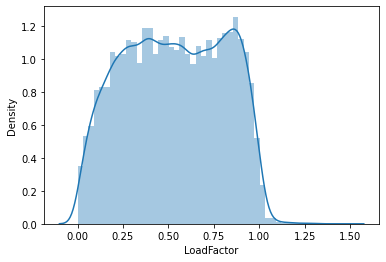

In [91]:
sns.distplot(data['LoadFactor'])